<a href="https://colab.research.google.com/github/kpr-03/DeepLearning_TensorFlow/blob/main/Medical_Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["smoker"],insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
# Let's try one-hot encode our data frame  so it's all number
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Create X & y values(features and labels)
X= insurance_one_hot.drop("charges",axis=1)
y= insurance_one_hot["charges"]

In [6]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create a training anad test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [9]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [10]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8515.6279 - mae: 8515.6279
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7850.4600 - mae: 7850.4600
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.2886 - mae: 7613.2886
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7526.5200 - mae: 7526.5200
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7667.2837 - mae: 7667.2837
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7606.4937 - mae: 7606.4937
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7533.1426 - mae: 7533.1426
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7722.3149 - mae: 7722.3149
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.6772 - mae: 7589.6772
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7729.3423 - mae: 7729.3423

In [11]:
# check the results of insurance model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8372.2754 - mae: 8372.2754


[8372.275390625, 8372.275390625]

In [12]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks liike our model is not performing well..let's try and improve it!

To (try) improve our model,we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Train for longer

3. (insert your own experiment here)

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13300.7725 - mae: 13300.7725
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13144.3311 - mae: 13144.3311
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12813.2559 - mae: 12813.2559
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12158.7236 - mae: 12158.7236
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11048.2178 - mae: 11048.2178
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9593.9746 - mae: 9593.9746
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8235.0762 - mae: 8235.0762
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7544.0854 - mae: 7544.0854
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7423.6699 - mae: 7423.6699
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7402.9902 - mae:

In [14]:
# Evaluate the model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4963.6123 - mae: 4963.6123


[4963.6123046875, 4963.6123046875]

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 6ms/step - loss: 13287.8516 - mae: 13287.8516
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13141.1289 - mae: 13141.1289
Epoch 3/200
34/34 [==============================] - 0s 10ms/step - loss: 12830.6318 - mae: 12830.6318
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12207.1250 - mae: 12207.1250
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11130.1914 - mae: 11130.1914
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9696.6992 - mae: 9696.6992
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8320.8428 - mae: 8320.8428
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 7591.1948 - mae: 7591.1948
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 7449.7852 - mae: 7449.7852
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7426.9897 - mae

In [16]:
# Evaluate the third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3496.1213 - mae: 3496.1213


[3496.121337890625, 3496.121337890625]

In [17]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8372.2754 - mae: 8372.2754


[8372.275390625, 8372.275390625]

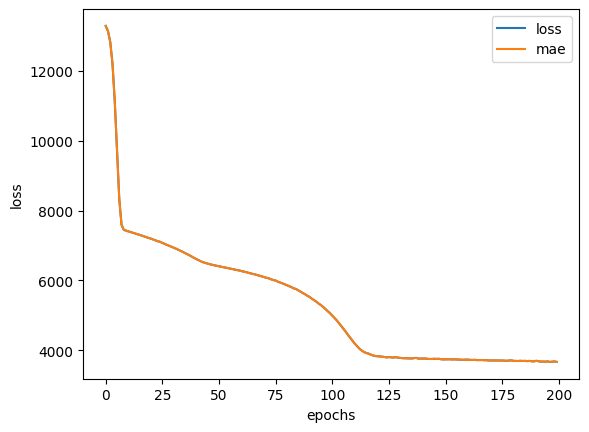

In [18]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving a certain metric.

Preprocessing data(normalization and standardization)

In terms of scaling values,neural networks tend to prefer normalization.

If you're  not sure on which to use,you could try both and see which perfroms better.
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow few classes from scikit-learn.

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"])  #turn all values in these columns between 0 and 1
    ,(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y
X= insurance.drop("charges",axis=1)
y= insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data wih normalization(MinMaxScaler)and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [30]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [31]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [32]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.
Now et's build a neural network model on it and see how it goes.

In [33]:
# build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. create the model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.compile the data
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13344.0762 - mae: 13344.0762
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13335.9180 - mae: 13335.9180
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13315.5146 - mae: 13315.5146
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13272.3369 - mae: 13272.3369
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13195.1064 - mae: 13195.1064
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13072.4014 - mae: 13072.4014
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12893.7852 - mae: 12893.7852
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12649.1680 - mae: 12649.1680
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12328.3975 - mae: 12328.3975
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11926.68

In [34]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3435.2017 - mae: 3435.2017


[3435.20166015625, 3435.20166015625]

In [36]:
# insurance_model_2 results
#9/9 [==============================] - 0s 4ms/step - loss: 4963.6123 - mae: 4963.6123

In [35]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
